In [1]:
#Laoding libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
#Reading and Transforming 'messages.csv' file in pandas dataframe
messages_df = pd.read_csv('messages-demo.csv', index_col='message_id')

C:\Users\harsh\AppData\Local\Temp\ipykernel_14456\210004582.py:2: DtypeWarning: Columns (7,8,16,17,19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  messages_df = pd.read_csv('messages-demo.csv', index_col='message_id')


In [3]:
messages_df.head(5)

,id,campaign_id,message_type,client_id,channel,category,platform,email_provider,stream,date,...,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at,created_at,updated_at
message_id,,,,,,,,,,,,,,,,,,,,,
3f6aaad3-bab7-4886-b083-fe8c1f210066,3527358,31,transactional,1515915625489833514,email,NaN,NaN,mail.ru,desktop,2021-04-30,...,f,NaN,f,NaN,f,NaN,t,2021-05-06 16:40:38,2023-04-27 08:55:05.883908,2023-04-27 08:57:33.080129
0e670ecc-4549-44f6-86ed-469682d34837,3527619,32,transactional,1515915625489220445,email,NaN,NaN,yandex.ru,desktop,2021-04-30,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.265821,2023-04-27 08:56:18.60223
276b25cf-1bda-4faf-b3a4-98e4161f9357,3527980,32,transactional,1515915625489854185,email,NaN,NaN,mail.ru,desktop,2021-04-30,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.777039,2023-04-27 08:56:19.112546
4545aff2-09b3-45e3-9abd-c680357e5429,3528369,32,transactional,1515915625489101550,email,NaN,NaN,mail.ru,desktop,2021-04-30,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.325906,2023-04-27 08:56:19.590637
5850858d-2dcf-4f31-a0d3-5db5649b17c4,3528648,32,transactional,1515915625490455948,email,NaN,NaN,mail.ru,desktop,2021-04-30,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.727792,2023-04-27 08:56:19.926474


In [6]:
# Calculate the percentage of missing values in each column
missing_percentages = messages_df.isnull().sum() / len(messages_df) * 100

# Set a threshold for the percentage of missing values above which a column is considered unnecessary
threshold = 80

# Identify columns with a high percentage of missing values
columns_to_remove = missing_percentages[missing_percentages > threshold].index

# Remove the unnecessary columns from the dataset
messages_df = messages_df.drop(columns=columns_to_remove)

# Print the updated dataset
print(messages_df.head())

                                           id  campaign_id   message_type  \
message_id                                                                  
3f6aaad3-bab7-4886-b083-fe8c1f210066  3527358           31  transactional   
0e670ecc-4549-44f6-86ed-469682d34837  3527619           32  transactional   
276b25cf-1bda-4faf-b3a4-98e4161f9357  3527980           32  transactional   
4545aff2-09b3-45e3-9abd-c680357e5429  3528369           32  transactional   
5850858d-2dcf-4f31-a0d3-5db5649b17c4  3528648           32  transactional   

                                                client_id channel  \
message_id                                                          
3f6aaad3-bab7-4886-b083-fe8c1f210066  1515915625489833514   email   
0e670ecc-4549-44f6-86ed-469682d34837  1515915625489220445   email   
276b25cf-1bda-4faf-b3a4-98e4161f9357  1515915625489854185   email   
4545aff2-09b3-45e3-9abd-c680357e5429  1515915625489101550   email   
5850858d-2dcf-4f31-a0d3-5db5649b17c4  15159156

In [7]:
# Deleting unnecessary columns from 'messages_df'
columns_to_drop = ['id', 'created_at', 'updated_at']

# Check if columns exist in the DataFrame before dropping them
columns_to_drop = [col for col in columns_to_drop if col in messages_df.columns]

# Drop the columns
messages_df.drop(columns=columns_to_drop, inplace=True)

In [9]:
#Changing datatypes of mesages dataset (messages_df) attributes
messages_df['campaign_id'] = messages_df['campaign_id'].astype('Int64')
messages_df['client_id'] = messages_df['client_id'].astype('Int64')

#Creating a method which will convert string characters into boolean value
def convert_to_bool(value):
    if value == 't':
        return True
    else:
        return False
#Changing datatypes of mesages dataset (messages_df) attributes
messages_df['is_opened'] = messages_df['is_opened'].apply(convert_to_bool)
messages_df['is_clicked'] = messages_df['is_clicked'].apply(convert_to_bool)
messages_df['is_unsubscribed'] = messages_df['is_unsubscribed'].apply(convert_to_bool)
messages_df['is_hard_bounced'] = messages_df['is_hard_bounced'].apply(convert_to_bool)
messages_df['is_soft_bounced'] = messages_df['is_soft_bounced'].apply(convert_to_bool)
messages_df['is_complained'] = messages_df['is_complained'].apply(convert_to_bool)
messages_df['is_blocked'] = messages_df['is_blocked'].apply(convert_to_bool)
messages_df['is_purchased'] = messages_df['is_purchased'].apply(convert_to_bool)

In [13]:
# Changing data types of messages dataset attributes
messages_df['date'] = pd.to_datetime(messages_df['date'])
messages_df['sent_at'] = pd.to_datetime(messages_df['sent_at'])

In [14]:
# List of columns from which you want to drop null values
columns = ['message_type','is_opened','is_hard_bounced','is_complained','is_blocked','is_purchased','sent_at']
# Drop null values from the specified columns
messages_df.dropna(subset=columns, inplace=True)

In [15]:
#Convert the 'messages_df' columns to their respective datatypes:
dtypes = {'sent_at': 'datetime64[ns]'}
messages_df = messages_df.astype(dtypes)

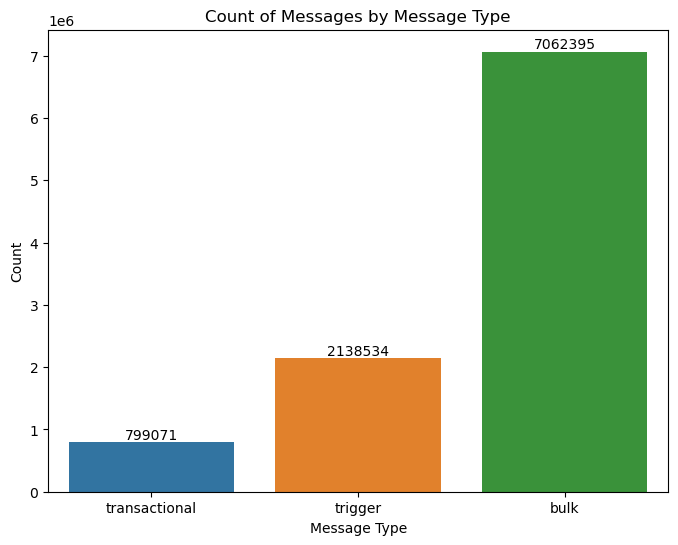

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'messages_df' with a column named 'message_type'

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='message_type', data=messages_df)
plt.title('Count of Messages by Message Type')
plt.xlabel('Message Type')
plt.ylabel('Count')

# Add count values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

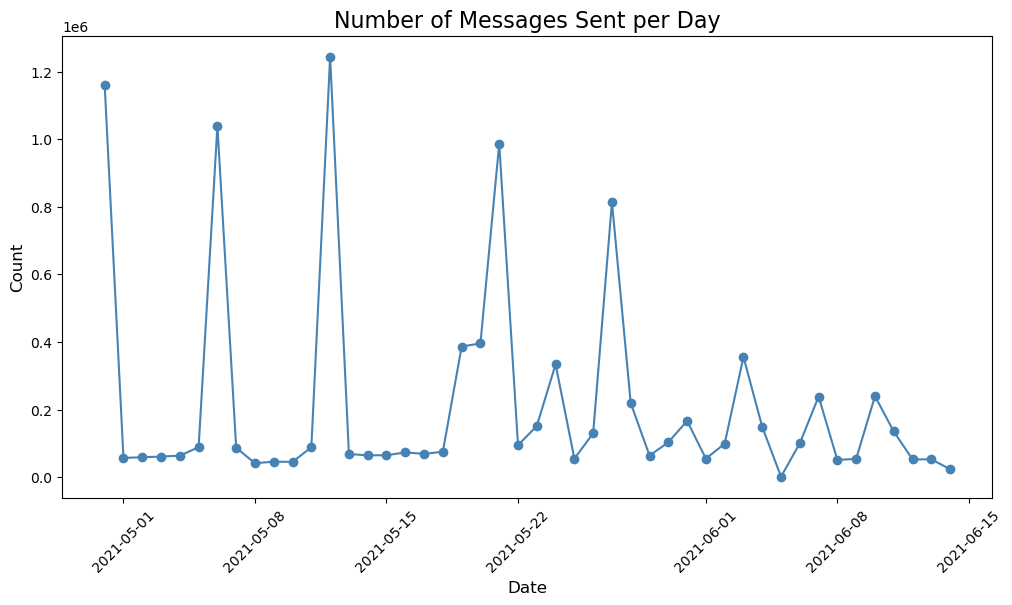

In [17]:
# Assuming you have a DataFrame named 'messages_df' with a column named 'date'

plt.figure(figsize=(12, 6))
messages_by_day = messages_df.groupby(messages_df['date'].dt.date).size()
messages_by_day.plot(kind='line', marker='o', color='steelblue')
plt.title('Number of Messages Sent per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

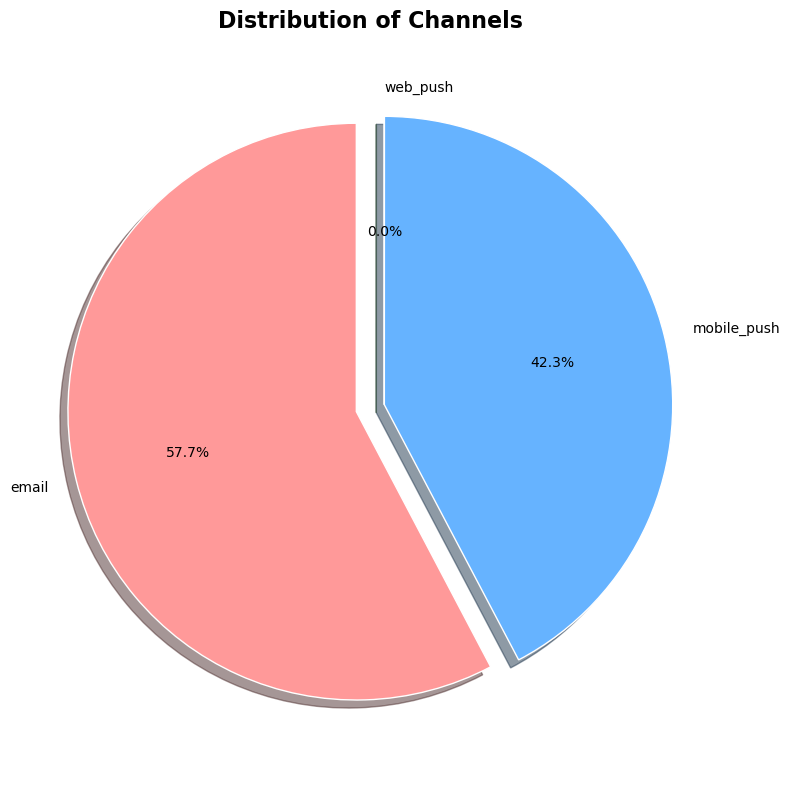

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'messages_df' with a column named 'channel'

plt.figure(figsize=(8, 8))
channel_counts = messages_df['channel'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Explode the largest slice
explode = [0.1 if i == channel_counts.idxmax() else 0 for i in channel_counts.index]

plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'white'})

plt.title('Distribution of Channels', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.tight_layout()
plt.show()

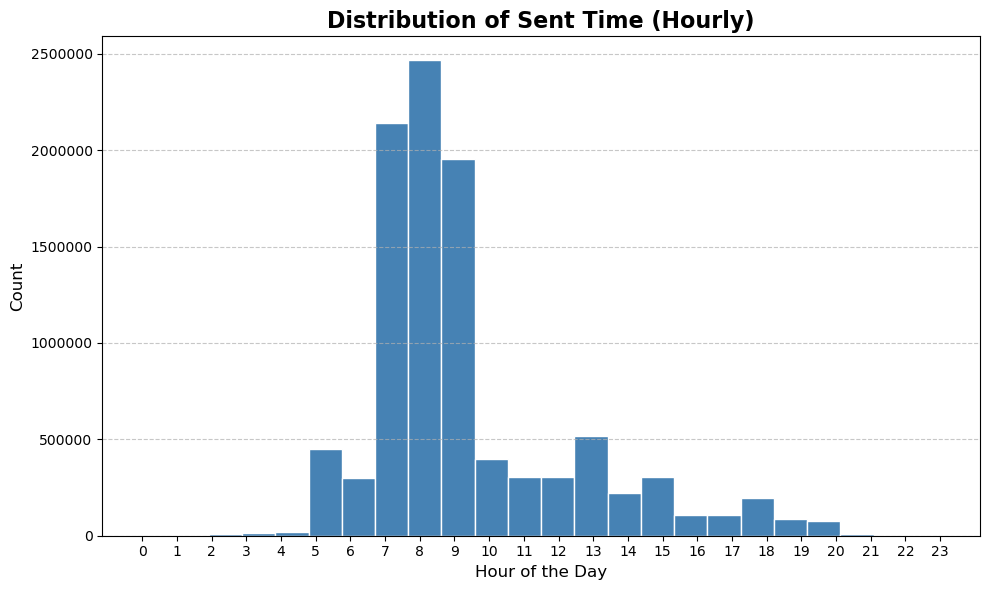

In [19]:
# Assuming you have a DataFrame named 'messages_df' with a column named 'sent_at' containing datetime values
plt.figure(figsize=(10, 6))
messages_df['sent_at_hour'] = messages_df['sent_at'].dt.hour

# Calculate the counts for each hour
hourly_counts = messages_df['sent_at_hour'].value_counts()

plt.hist(messages_df['sent_at_hour'], bins=24, color='steelblue', edgecolor='white')

plt.title('Distribution of Sent Time (Hourly)', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Format y-axis labels in millions
plt.ticklabel_format(style='plain', axis='y', scilimits=(6, 6))
plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.xticks(range(0, 24))
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [20]:
messages_df['Hour'] = messages_df['sent_at'].dt.hour

In [21]:
def time_periods(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    else:
        return 'Evening'
    
#Apply the custom function to the 'hour' column and create a new 'period' column
messages_df['TimePeriod'] = messages_df['Hour'].apply(time_periods)

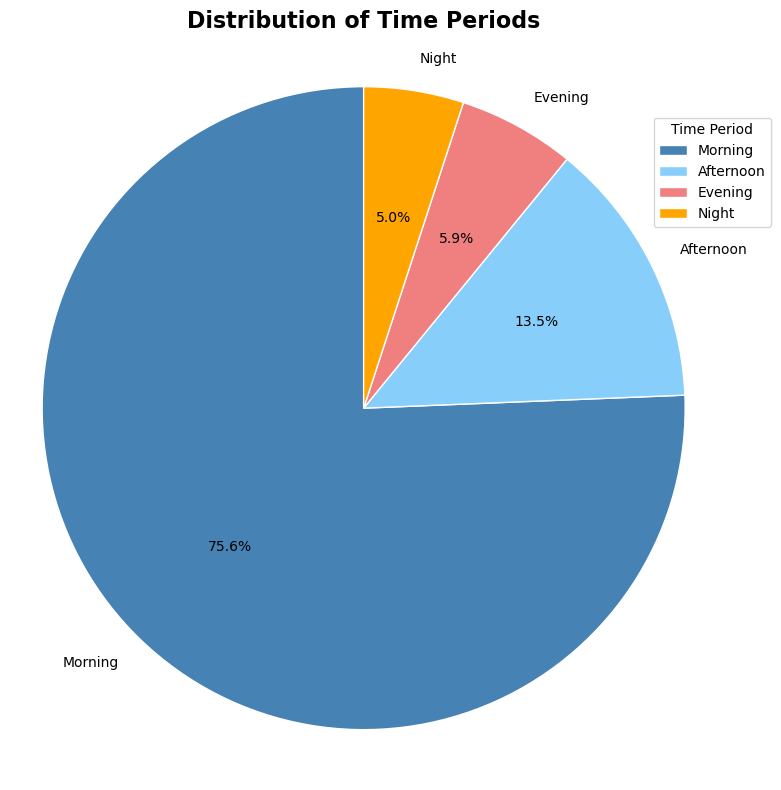

In [22]:
# Assuming you have a DataFrame named 'messages_df' with a column named 'TimePeriod'
plt.figure(figsize=(8, 8))
time_period_counts = messages_df['TimePeriod'].value_counts()

# Define custom colors for the pie chart
colors = ['steelblue', 'lightskyblue', 'lightcoral','orange']

plt.pie(time_period_counts, labels=time_period_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops={'edgecolor': 'white'})

plt.title('Distribution of Time Periods', fontsize=16, fontweight='bold')
plt.axis('equal')

# Add a legend with custom colors and title
legend_labels = time_period_counts.index
plt.legend(legend_labels, title='Time Period', loc='best', bbox_to_anchor=(0.9, 0.9))

plt.tight_layout()
plt.show()